**Notes Removed Broken Slices Results**

* Removing damaged image slices caused an improvement in the SVC classifier surpassing the no information baseline.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar

%matplotlib inline

In [112]:
def format_estimator_labels(labels):
    
    mapper = {
        'QuadraticDiscriminantEstimator': 'QDA',
        'ExtraTreesEstimator': 'Extra Trees',
        'KNNEstimator': 'KNN',
        'LightGBM': 'LightGBM',
        'LogRegEstimator': 'Logistic Regression',
        'RFEstimator': 'Random Forest',
        'SVCEstimator': 'SVC',
        'DTreeEstimator': 'Decision Tree', 
        'XGBoost': 'XGBoost',
        'RidgeClassifier': 'Ridge Classifier'
    }
    new_labels = []
    for label in labels:
        new_labels.append(mapper[label])
        
    return new_labels

In [89]:
def format_selector_labels(labels):
    
    mapper = {
        'ChiSquareSelection': 'Chi Square',
        'DummySelection': 'No Feature\nSelection',
        'WilcoxonSelection': 'Wilcoxon',
        'FisherScoreSelection': 'Fisher Score',
        'MultiSURFSelection': 'MultiSURF',
        'MutualInformationSelection': 'Mutual\nInformation',
        'ReliefFSelection': 'ReliefF'
    }
    new_labels = []
    for label in labels:
        new_labels.append(mapper[label])
        
    return new_labels

In [66]:
def gen_heatmap(results, kind='test_score'):
    
    _selector_lbls, _estimator_lbls = [], []
    for label in np.unique(results['experiment_id']):

        selector_lbl, estimator_lbl = label.split('_')

        _selector_lbls.append(selector_lbl)
        _estimator_lbls.append(estimator_lbl)

    selector_lbls = np.unique(_selector_lbls)
    estimator_lbls = np.unique(_estimator_lbls)
    
    
    results_mat = np.zeros((len(estimator_lbls), len(selector_lbls)))
    for row_num, estimator_lbl in enumerate(estimator_lbls):
        for col_num, selector_lbl in enumerate(selector_lbls):

            label = f'{selector_lbl}_{estimator_lbl}'
            location = np.where(label == np.array(results['experiment_id']))
            scores = results.iloc[np.squeeze(location), :][kind]

            results_mat[row_num, col_num] = np.mean(scores)
    
    return results_mat, selector_lbls, estimator_lbls

# Original Images

In [67]:
results_orig = pd.read_csv(
    './../../data_source/results/original_images/results_all_features_original_images.csv',
    index_col=0
)
results_orig.head()

,exp_id,experiment_id,QuadraticDiscriminantEstimator__reg_param,test_score,train_score,test_score_variance,train_score_variance,feature_votes,target_test_support,target_train_support,...,RFEstimator__n_estimators,KNNEstimator__leaf_size,KNNEstimator__metric,KNNEstimator__n_neighbors,KNNEstimator__p,DTreeEstimator__criterion,DTreeEstimator__max_depth,DTreeEstimator__max_features,DTreeEstimator__min_samples_leaf,exp_duration
0,0,DummySelection_QuadraticDiscriminantEstimator,0.000093,0.573718,0.994155,0.005760,0.000023,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[670 320],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,DummySelection_QuadraticDiscriminantEstimator,0.001000,0.558974,0.968854,0.006729,0.000272,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[670 320],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,DummySelection_QuadraticDiscriminantEstimator,0.001000,0.558974,0.968854,0.006729,0.000272,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[670 320],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39,DummySelection_QuadraticDiscriminantEstimator,0.320837,0.548077,0.747602,0.003981,0.000360,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[670 320],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,DummySelection_QuadraticDiscriminantEstimator,0.001000,0.562821,0.972624,0.001580,0.000055,[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5...,[0 0],[670 320],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
results_orig.shape

(2800, 53)

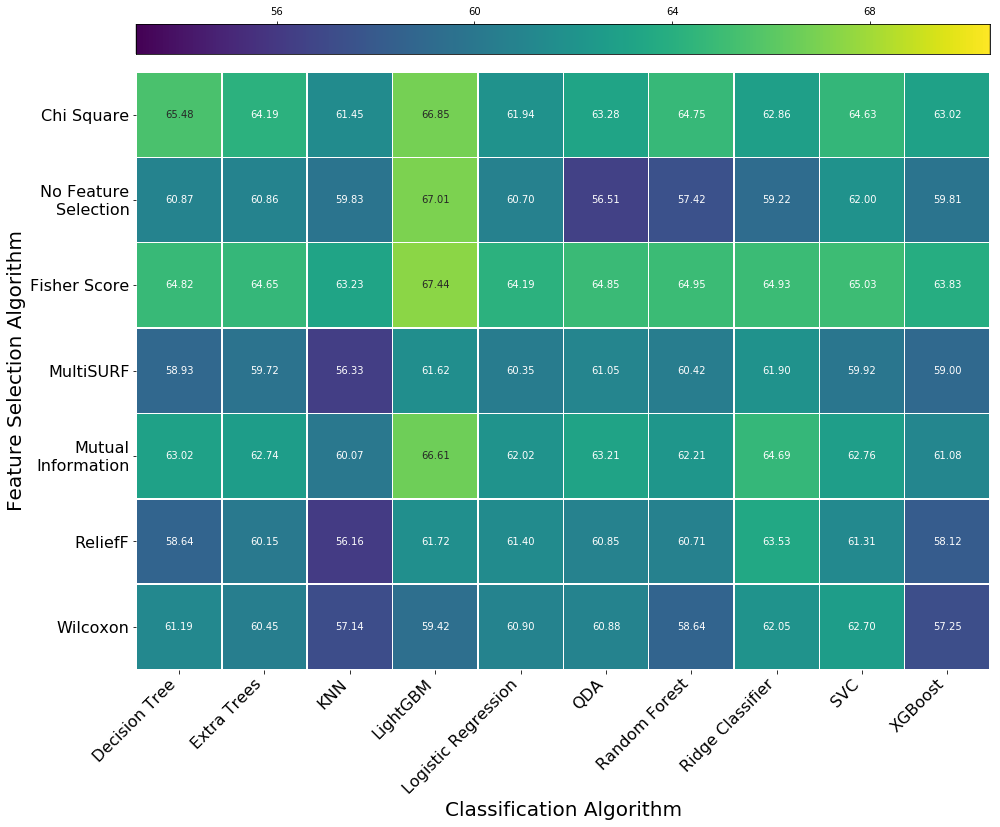

In [113]:
# Observations:
# * MultiSURF vs. ReliefF?

orig_results_mat, selector_lbls, estimator_lbls = gen_heatmap(results_orig)

fig = plt.figure(figsize=(14, 14))
hmap = sns.heatmap(
    orig_results_mat.T * 100,
    yticklabels=format_selector_labels(selector_lbls),
    xticklabels=format_estimator_labels(estimator_lbls),
    vmin=np.nanmin(orig_results_mat) * 100 - 3, 
    vmax=np.nanmax(orig_results_mat) * 100 + 3,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.2f', 
    square=1, 
    linewidth=.5,
    cbar=False,
)
plt.xlabel('Classification Algorithm', fontsize=20)
plt.ylabel('Feature Selection Algorithm', fontsize=20, va='bottom', ha='center')

hmap.set_yticklabels(hmap.get_yticklabels(), rotation=0, fontsize=16)
hmap.set_xticklabels(
    hmap.get_xticklabels(), rotation=45, fontsize=16, 
    va='top', ha='right'
)
ax_divider = make_axes_locatable(hmap)
# define size and padding of axes for colorbar
cax = ax_divider.append_axes('top', size='5%', pad='3%')
colorbar(hmap.get_children()[0], cax=cax, orientation='horizontal')
cax.xaxis.set_ticks_position('top')

plt.tight_layout()

plt.savefig(
    './../../figures/model_comparison_results/hmap_original_images.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100, 
)

In [11]:
np.sum(orig_results_mat >= 0.6767)

0

In [12]:
orig_results_mat, selector_lbls, estimator_lbls = gen_heatmap(results_orig, kind='test_score_variance')

In [13]:
orig_results_mat

array([[0.00563815, 0.00466368, 0.00492502, 0.00536142, 0.00589258,
        0.00458364, 0.00598547],
       [0.00445298, 0.00411735, 0.00411962, 0.00392432, 0.00379884,
        0.00489935, 0.00507877],
       [0.00457978, 0.00394548, 0.00449845, 0.00321708, 0.0037917 ,
        0.00324405, 0.00337931],
       [0.00491846, 0.00423243, 0.00526718, 0.00561171, 0.00563687,
        0.00498148, 0.00384905],
       [0.00561965, 0.00448724, 0.00495115, 0.00459137, 0.00435604,
        0.0046134 , 0.00545729],
       [0.00447539, 0.00423085, 0.0052307 , 0.00272501, 0.00295165,
        0.00379963, 0.00504296],
       [0.00382969, 0.00336409, 0.00293491, 0.00386817, 0.00498347,
        0.00387802, 0.00381576],
       [0.00424612, 0.0039229 , 0.00500369, 0.00482451, 0.00490424,
        0.00488853, 0.00483244],
       [0.00551851, 0.00478485, 0.00509654, 0.00612368, 0.00514375,
        0.00526087, 0.00566438],
       [0.00418574, 0.00444901, 0.00335455, 0.00397711, 0.0062548 ,
        0.00333552, 0.0

# Removed Broken Slices

In [12]:
results_rs = pd.read_csv(
    './../../data_source/results/removed_broken_slices/results_all_features_removed_broken_slices.csv',
    index_col=0
)
results_rs.head()

,exp_id,experiment_id,LinearDiscriminantEstimator__n_components,LinearDiscriminantEstimator__tol,test_score,train_score,test_score_variance,train_score_variance,feature_votes,StudentTTestSelection__num_features,...,DTreeEstimator__criterion,DTreeEstimator__max_depth,DTreeEstimator__max_features,DTreeEstimator__min_samples_leaf,ExtraTreesEstimator__criterion,ExtraTreesEstimator__max_depth,ExtraTreesEstimator__max_features,ExtraTreesEstimator__min_samples_leaf,ExtraTreesEstimator__n_estimators,exp_duration
0,0,DummySelection_LinearDiscriminantEstimator,10.0,0.5,0.505641,0.5,0.012844,0.25,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,DummySelection_LinearDiscriminantEstimator,10.0,0.5,0.500513,0.6,0.024975,0.24,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,DummySelection_LinearDiscriminantEstimator,10.0,0.5,0.500513,0.6,0.024975,0.24,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39,DummySelection_LinearDiscriminantEstimator,10.0,0.5,0.533846,0.8,0.011720,0.16,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,DummySelection_LinearDiscriminantEstimator,10.0,0.5,0.461795,0.3,0.021064,0.21,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
results_rs.shape

(2800, 57)

In [ ]:
red_results_mat, selector_lbls, estimator_lbls = gen_heatmap(results_rs)

In [ ]:
plt.figure(figsize=(11, 11))
hmap = sns.heatmap(
    red_results_mat.T * 100,
    yticklabels=selector_lbls,
    xticklabels=estimator_lbls,
    vmin=np.nanmin(rs_results_mat) * 100 - 1e-4, 
    vmax=np.nanmax(rs_results_mat) * 100 + 1e-4,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.2f', 
    square=1, 
    linewidth=.5, 
    cbar=True,
    cbar_kws={'shrink': 0.7, 'orientation': 'horizontal'},  
)
plt.xticks(np.arange(len(estimator_lbls)), rotation=45, ha='center')
plt.tight_layout()
#plt.savefig(
#    './../../../figures/50evals_50reps_univariate_dfs.png',
#    bbox_inches='tight',
#    transparent=True,
#    dpi=100, 
#)

In [ ]:
sum(red_results_mat > 0.684)